We seldom see a dataset with a usability rating this low. Let's load up this data and see what it has to offer.

In [1]:
import pandas as pd

DATA = '/kaggle/input/nvidia-stock-sentiment/nvidia_stock_sentiment.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['date'])
df['year'] = df['date'].dt.year
df.head()

,date,finvader,high,low,adjusted_close,year
0,2015-07-07,0.997600,20.13,19.160,0.4791,2015
1,2015-07-08,0.963223,19.80,19.490,0.4757,2015
2,2015-07-09,0.928846,20.05,19.290,0.4699,2015
3,2015-07-10,0.894469,19.93,19.610,0.4781,2015
4,2015-07-13,0.860092,19.99,19.745,0.4812,2015


First let's do the easy thing and plot the adjusted close data as a lineplot and use the year to indicate the passage of time.

<Axes: xlabel='date', ylabel='adjusted_close'>

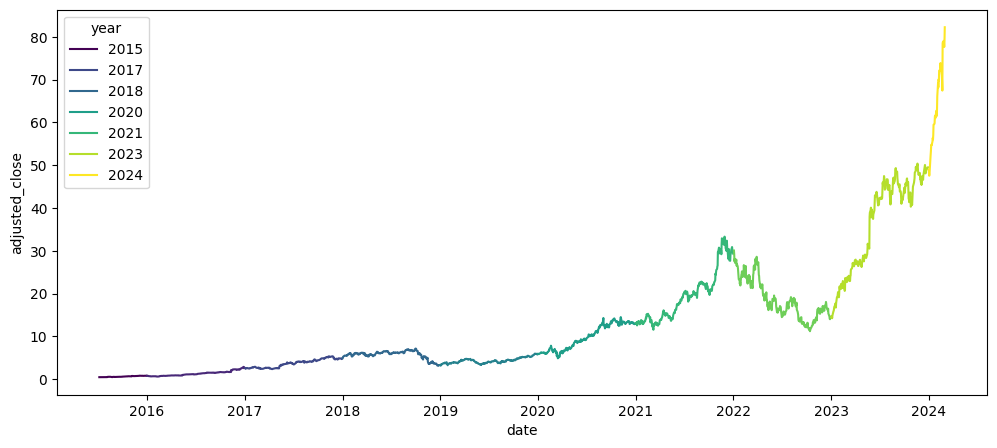

In [2]:
import matplotlib.pyplot as plt
from seaborn import lineplot
from warnings import filterwarnings

FIGSIZE = (12, 5)
filterwarnings(action='ignore', category=FutureWarning)
plt.figure(figsize=FIGSIZE)
lineplot(palette='viridis', data=df, x='date', y='adjusted_close', hue='year', )

This gives us the basic time series showing the progress of the price over time on an absolute (adjusted) basis. Let's look at the log of the price to see the relative change over time.

<Axes: xlabel='date', ylabel='adjusted_close'>

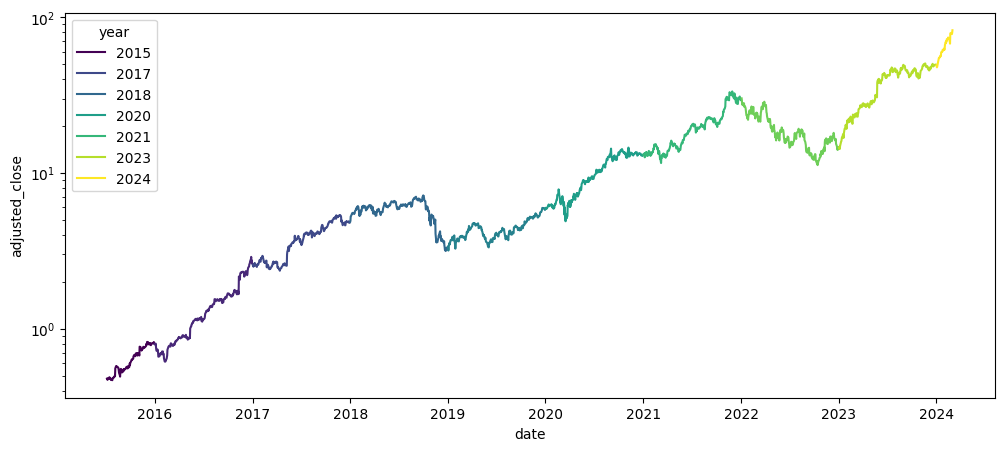

In [3]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
lineplot(palette='viridis', data=df, x='date', y='adjusted_close', hue='year', )

Using the log plot we can see that recent reversals, while they are large in an absolute sense, are small in a relative sense. 

Let's have a look at the finvader value itself. WHat does it distribution look like?

<Axes: xlabel='finvader', ylabel='Count'>

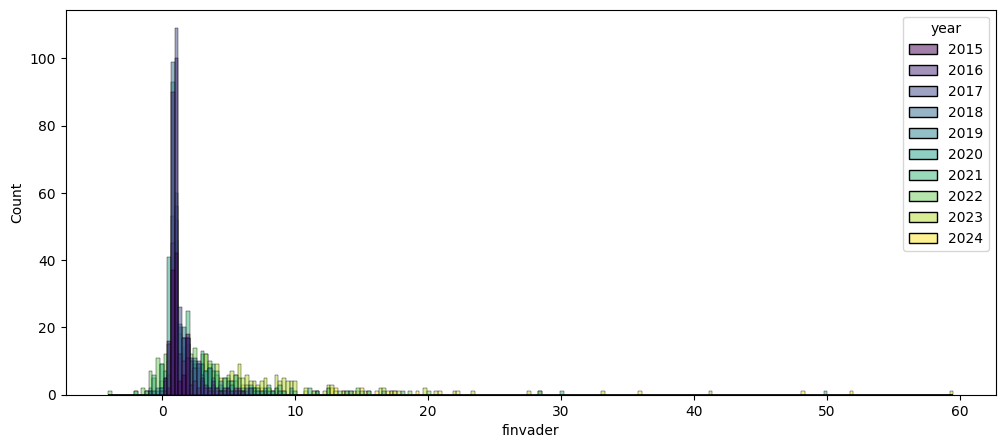

In [4]:
from seaborn import histplot

plt.figure(figsize=FIGSIZE)
histplot(palette='viridis', data=df, x='finvader', hue='year')

What do we see? We see that it is mostly near zero, and it does not look like it is correlated with the year. Let's try another couple of plots.

<Axes: xlabel='adjusted_close', ylabel='finvader'>

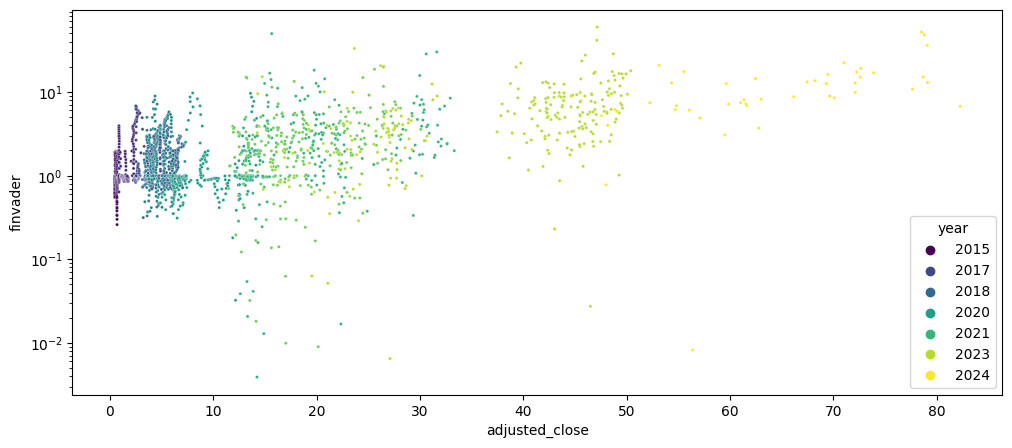

In [5]:
from seaborn import scatterplot

plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='adjusted_close', y='finvader', hue='year')

WHat do we see in this plot? We see that the price has grown over time, as the colors tend to change with the price level, but the sentiment variable does not appear to be correlated with the price. Let's find the correlation.

In [6]:
df[['adjusted_close', 'finvader']].corr()

,adjusted_close,finvader
adjusted_close,1.000000,0.564394
finvader,0.564394,1.000000


Wow. The price and sentiment are in fact substantially correlated as measured overall with the Pearson correlation. They just don't look that way in our scatterplot.